# Citibike Trip Data

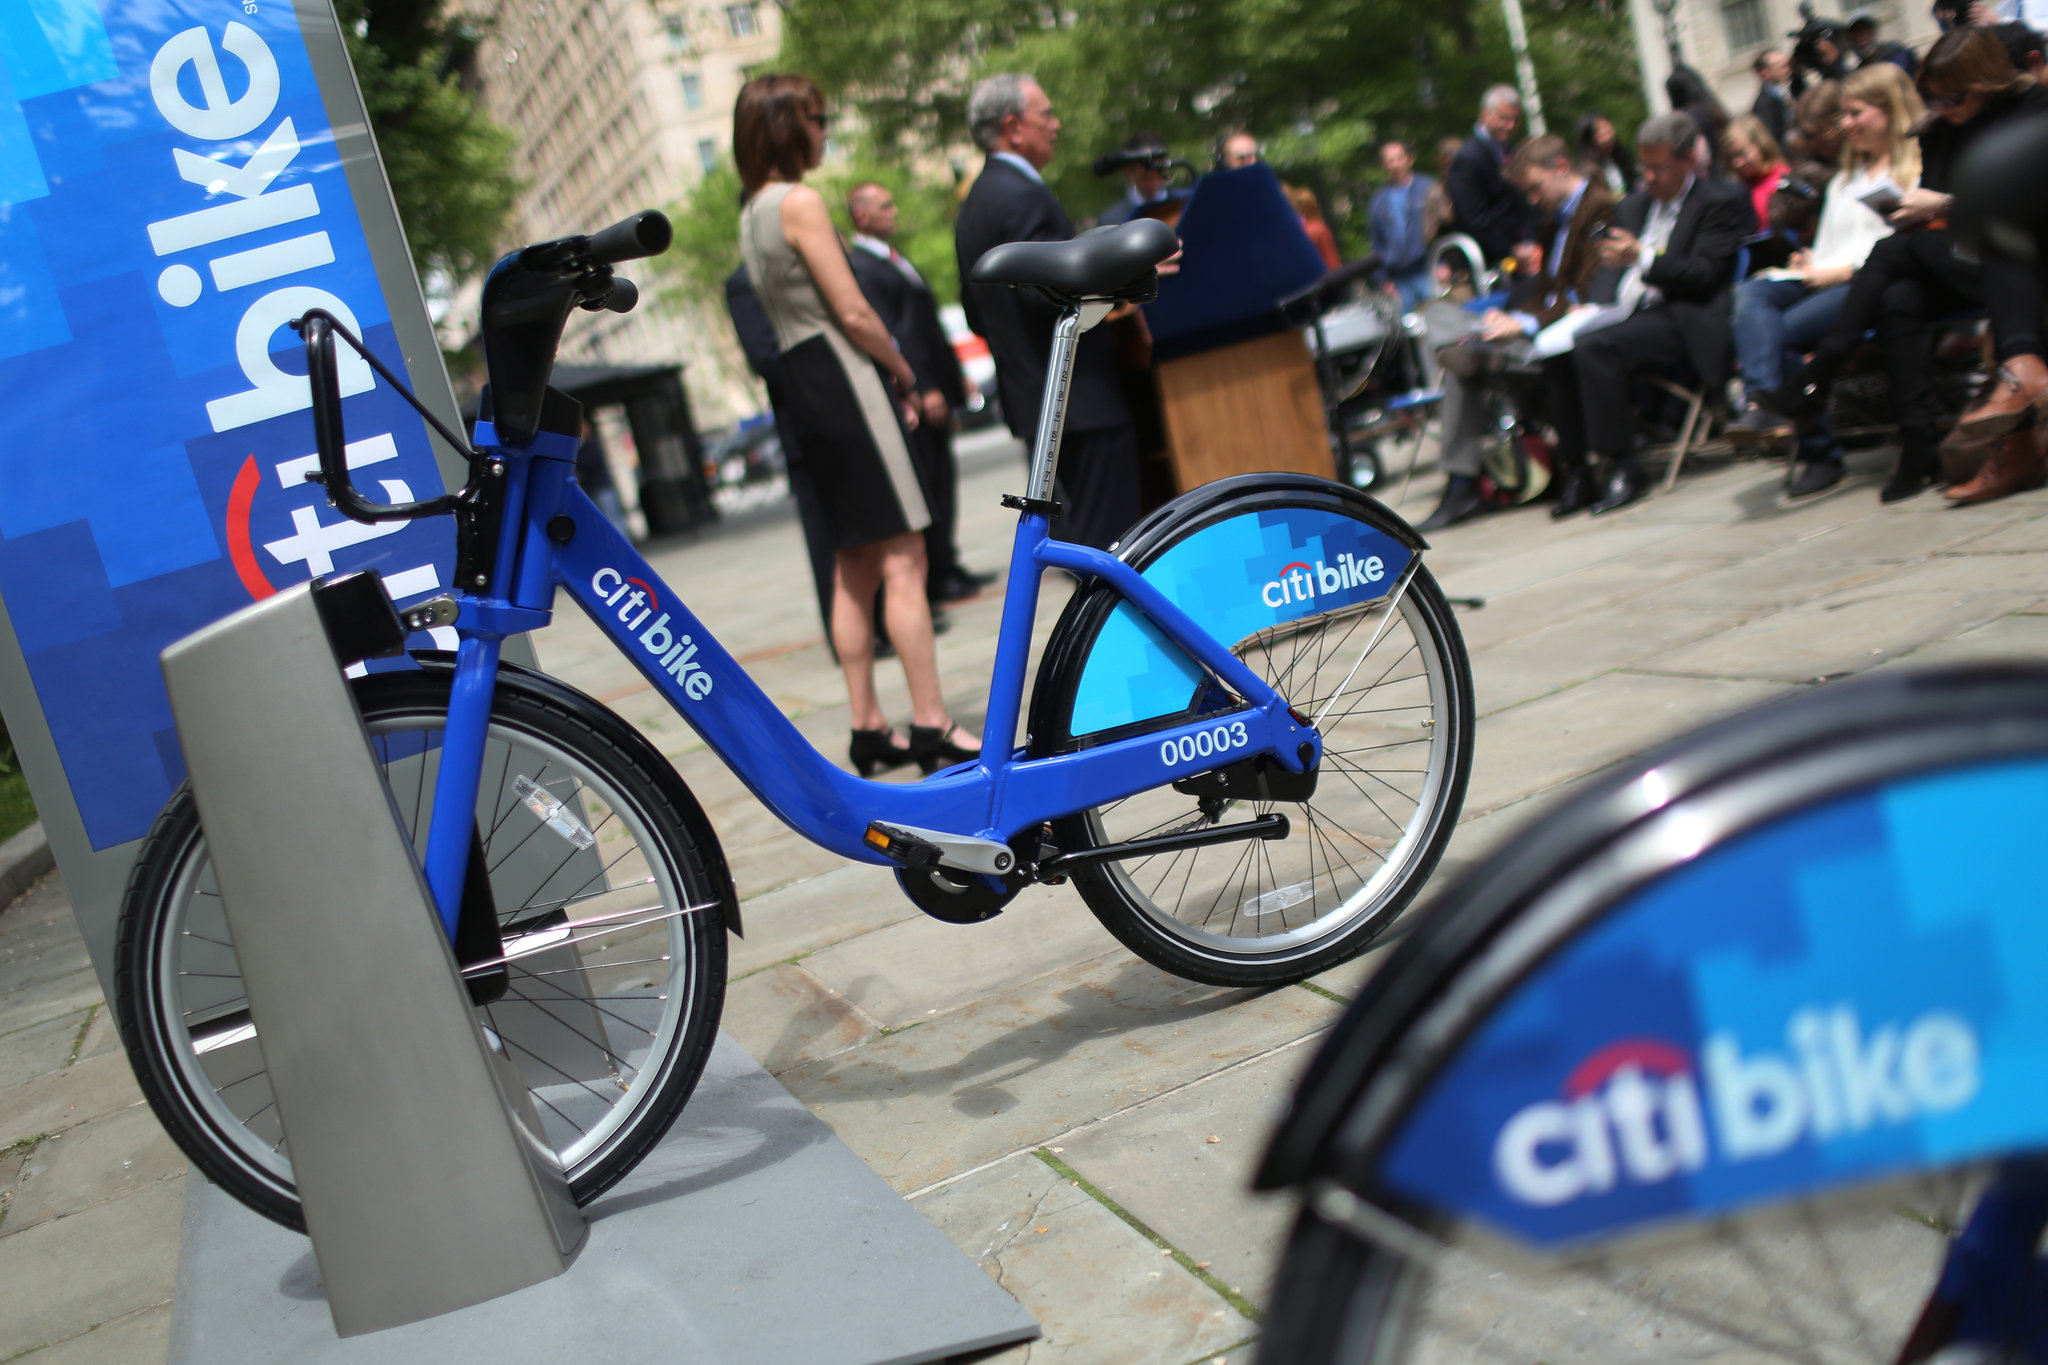

In [1]:
from IPython.display import Image
Image(filename='citibike.png', width=500, height=200)

### Tools Used in This Analysis

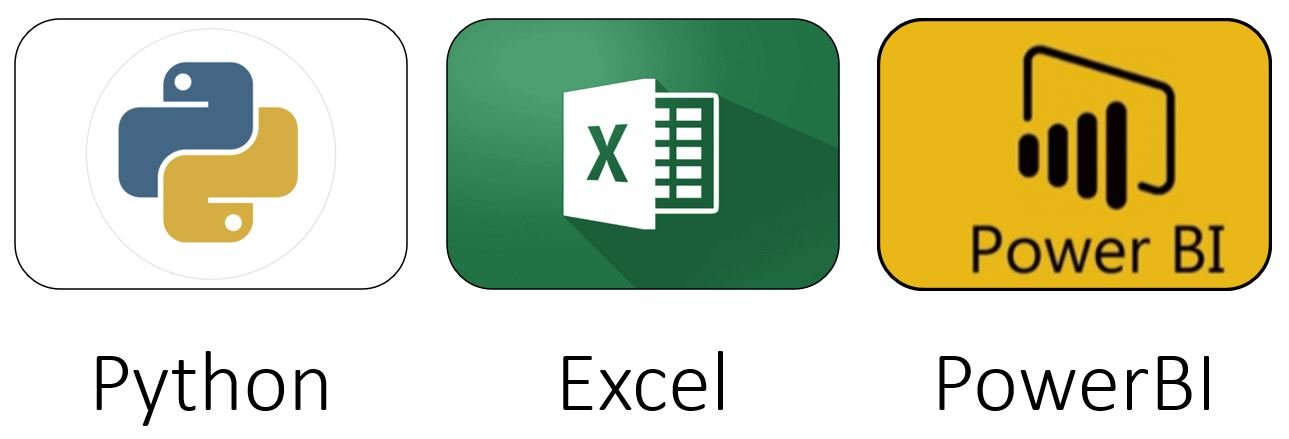

In [2]:
from IPython.display import Image
Image(filename='Tools.jpg', width=500, height=200)

#### Introduction

This notebook will accomplish the following tasks:

#### Section 01: Data Cleaning
- Remove white spaces from column names.
- Check for null values.
- Check for outliers.
- Transform any variables that warrant transforming.
- Create useful fields with the given data?

#### Section 02: Data Analysis
- Where do Citi Bikers ride? 
- How far do they go? 
- Which bike stations are most popular? 
- What days of the week are most rides taken on?
- What time of the day do they ride? 
- What gender is the average bike rider?
- What type of pass do bike rider use?
- How much revenue did Citibike generate in 2016?

#### Key Takeaways From This Analysis

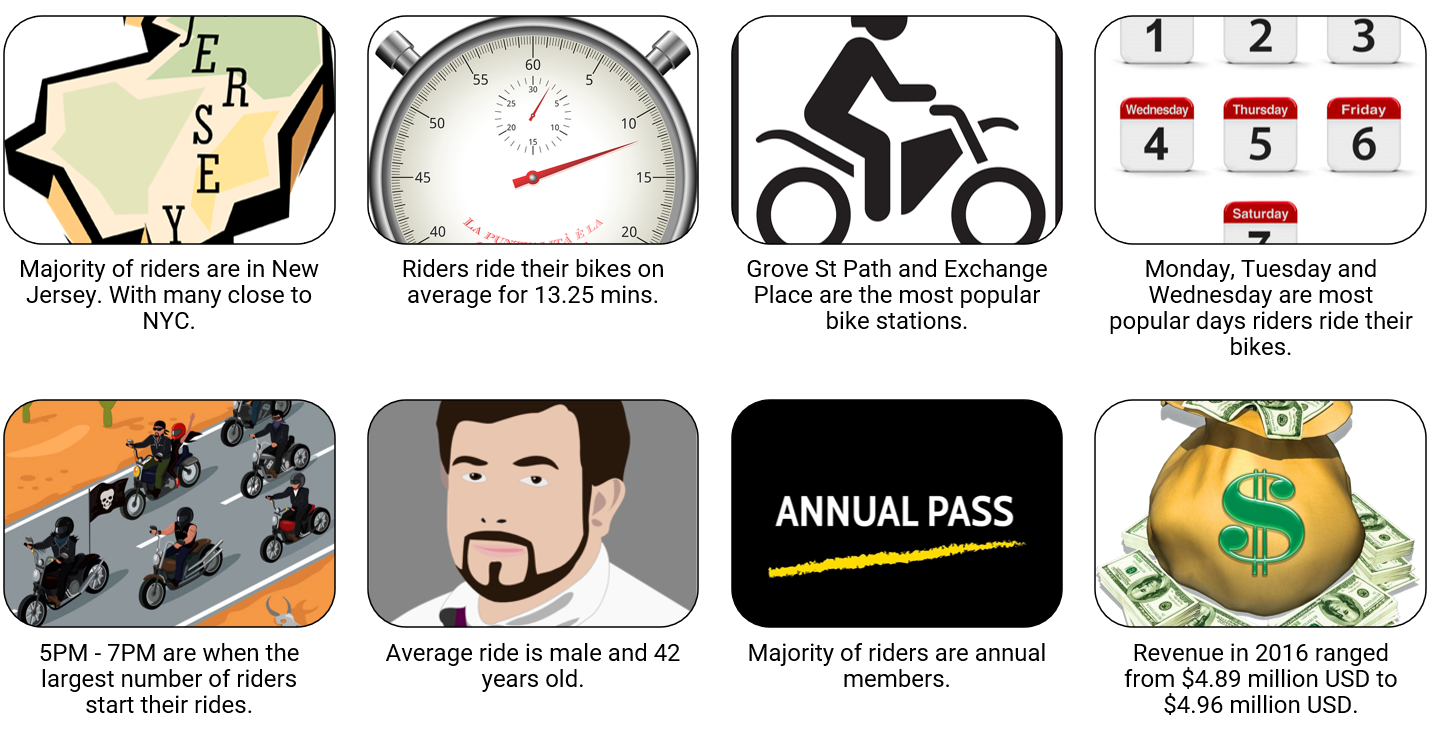

In [58]:
from IPython.display import Image
Image(filename='key_takeaways.png', width=1000, height=200)

In [3]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ipywidgets import interact

In [4]:
df = pd.read_csv('citibike.csv')
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,165,2016-08-01 00:09:40,2016-08-01 00:12:25,3270,Jersey & 6th St,40.725289,-74.045572,3273,Manila & 1st,40.721651,-74.042884,24679,Subscriber,1968.0,1
1,705,2016-08-01 01:45:08,2016-08-01 01:56:53,3186,Grove St PATH,40.719586,-74.043117,3206,Hilltop,40.731169,-74.057574,24530,Subscriber,1978.0,1
2,854,2016-08-01 02:22:26,2016-08-01 02:36:41,3183,Exchange Place,40.716247,-74.033459,3190,Garfield Ave Station,40.710467,-74.070039,24649,Subscriber,1988.0,1
3,211,2016-08-01 03:05:10,2016-08-01 03:08:41,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24624,Subscriber,1986.0,1
4,506,2016-08-01 03:25:42,2016-08-01 03:34:09,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24624,Subscriber,1986.0,1


### Section 01: Data Cleaning

###### Remove white spaces from column names.

In [5]:
df.columns = df.columns.str.replace(' ', '')
df.head()

,TripDuration,StartTime,StopTime,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,BikeID,UserType,BirthYear,Gender
0,165,2016-08-01 00:09:40,2016-08-01 00:12:25,3270,Jersey & 6th St,40.725289,-74.045572,3273,Manila & 1st,40.721651,-74.042884,24679,Subscriber,1968.0,1
1,705,2016-08-01 01:45:08,2016-08-01 01:56:53,3186,Grove St PATH,40.719586,-74.043117,3206,Hilltop,40.731169,-74.057574,24530,Subscriber,1978.0,1
2,854,2016-08-01 02:22:26,2016-08-01 02:36:41,3183,Exchange Place,40.716247,-74.033459,3190,Garfield Ave Station,40.710467,-74.070039,24649,Subscriber,1988.0,1
3,211,2016-08-01 03:05:10,2016-08-01 03:08:41,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24624,Subscriber,1986.0,1
4,506,2016-08-01 03:25:42,2016-08-01 03:34:09,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24624,Subscriber,1986.0,1


In [6]:
df.dtypes

TripDuration               int64
StartTime                 object
StopTime                  object
StartStationID             int64
StartStationName          object
StartStationLatitude     float64
StartStationLongitude    float64
EndStationID               int64
EndStationName            object
EndStationLatitude       float64
EndStationLongitude      float64
BikeID                     int64
UserType                  object
BirthYear                float64
Gender                     int64
dtype: object

In [7]:
# Converting the StartTime field to a datatime.
df['StartTime'] = pd.to_datetime(df['StartTime'])

# Converting the StopTime field to a datatime.
df['StopTime'] = pd.to_datetime(df['StopTime'])

df.dtypes

TripDuration                      int64
StartTime                datetime64[ns]
StopTime                 datetime64[ns]
StartStationID                    int64
StartStationName                 object
StartStationLatitude            float64
StartStationLongitude           float64
EndStationID                      int64
EndStationName                   object
EndStationLatitude              float64
EndStationLongitude             float64
BikeID                            int64
UserType                         object
BirthYear                       float64
Gender                            int64
dtype: object

###### Check for null values.

- There are 54 null values in the UserType field and 3,432 null values in the BirthYear field.

- We can handle handle the null values in the UserType field by dropping rows of data in the other fields so they match up with the UserType field.

- For the BirthYear field we can take the average BirthYear and replace the missing values with that value.

In [8]:
df.isna().sum()

TripDuration                0
StartTime                   0
StopTime                    0
StartStationID              0
StartStationName            0
StartStationLatitude        0
StartStationLongitude       0
EndStationID                0
EndStationName              0
EndStationLatitude          0
EndStationLongitude         0
BikeID                      0
UserType                   54
BirthYear                3432
Gender                      0
dtype: int64

In [9]:
# We'll fill in missing BirthYear values with median BirthYear.
df['BirthYear'] = df['BirthYear'].fillna(df['BirthYear'].mean())
df.isna().sum()

TripDuration              0
StartTime                 0
StopTime                  0
StartStationID            0
StartStationName          0
StartStationLatitude      0
StartStationLongitude     0
EndStationID              0
EndStationName            0
EndStationLatitude        0
EndStationLongitude       0
BikeID                    0
UserType                 54
BirthYear                 0
Gender                    0
dtype: int64

In [10]:
# Now we'll drop the rows of data that have null values in the UserType field.
# Below we can see that we have no null values now.
df = df.dropna()
df.isna().sum()

TripDuration             0
StartTime                0
StopTime                 0
StartStationID           0
StartStationName         0
StartStationLatitude     0
StartStationLongitude    0
EndStationID             0
EndStationName           0
EndStationLatitude       0
EndStationLongitude      0
BikeID                   0
UserType                 0
BirthYear                0
Gender                   0
dtype: int64

###### Check for outliers.

- For outliers, we can check for those using a box and whisker plot.

In [11]:
df.head(1)

,TripDuration,StartTime,StopTime,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,BikeID,UserType,BirthYear,Gender
0,165,2016-08-01 00:09:40,2016-08-01 00:12:25,3270,Jersey & 6th St,40.725289,-74.045572,3273,Manila & 1st,40.721651,-74.042884,24679,Subscriber,1968.0,1


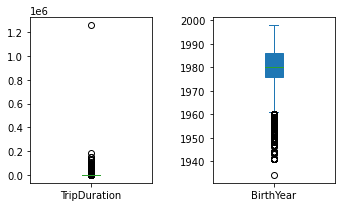

In [12]:
# Checking for outliers in the data using a box and whisker plot.

# Here we're selecting the columns we don't want to check outliers for. 
df_to_plot = df.drop(columns=['StartTime', 
                              'StopTime', 
                              'StartStationID', 
                              'StartStationName',
                             'StartStationLatitude',
                             'StartStationLongitude',
                             'EndStationID',
                             'EndStationName',
                             'EndStationLatitude',
                             'EndStationLongitude',
                             'BikeID',
                             'UserType',
                             'Gender']).select_dtypes(include=np.number)

# Mapping out the data using a box and whisker plot. 
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

# Below we can see multiple outliers in the TripDuration and BirthYear fields.
# Not sure we need to drop any of the outliers as they all seem acceptable.

#### Are there any variables that warrant transformations?
- Changing the TripDuration field to TripDuration_in_Seconds so it's easier to read.

In [13]:
df.rename(columns = {'TripDuration':'Trip_Duration_in_Seconds'}, inplace = True)
df.head()

,Trip_Duration_in_Seconds,StartTime,StopTime,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,BikeID,UserType,BirthYear,Gender
0,165,2016-08-01 00:09:40,2016-08-01 00:12:25,3270,Jersey & 6th St,40.725289,-74.045572,3273,Manila & 1st,40.721651,-74.042884,24679,Subscriber,1968.0,1
1,705,2016-08-01 01:45:08,2016-08-01 01:56:53,3186,Grove St PATH,40.719586,-74.043117,3206,Hilltop,40.731169,-74.057574,24530,Subscriber,1978.0,1
2,854,2016-08-01 02:22:26,2016-08-01 02:36:41,3183,Exchange Place,40.716247,-74.033459,3190,Garfield Ave Station,40.710467,-74.070039,24649,Subscriber,1988.0,1
3,211,2016-08-01 03:05:10,2016-08-01 03:08:41,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24624,Subscriber,1986.0,1
4,506,2016-08-01 03:25:42,2016-08-01 03:34:09,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24624,Subscriber,1986.0,1


- Going to export the data to a csv and use excel to extract the day of the week for the values in the StartTime column.

In [14]:
# Exporting the data to a csv.
df.to_csv('Output.csv', index = False)

In [44]:
# Below we can see the days of the week for the StartTime and StopTime.
df = pd.read_csv('output_edited.csv')
df.head()

,Trip_Duration_in_Seconds,Trip_Duration_in_Minutes,StartTime,StartTime_Day,StartTime_Hour,StopTime,StopTime_Day,StartStationID,StartStationName,StartStationLatitude,StartStationLongitude,EndStationID,EndStationName,EndStationLatitude,EndStationLongitude,BikeID,UserType,BirthYear,Gender
0,165,2.75,8/1/2016 0:09,Monday,0,8/1/2016 0:12,Monday,3270,Jersey & 6th St,40.725289,-74.045572,3273,Manila & 1st,40.721651,-74.042884,24679,Subscriber,1968,1
1,705,11.75,8/1/2016 1:45,Monday,1,8/1/2016 1:56,Monday,3186,Grove St PATH,40.719586,-74.043117,3206,Hilltop,40.731169,-74.057574,24530,Subscriber,1978,1
2,854,14.23,8/1/2016 2:22,Monday,2,8/1/2016 2:36,Monday,3183,Exchange Place,40.716247,-74.033459,3190,Garfield Ave Station,40.710467,-74.070039,24649,Subscriber,1988,1
3,211,3.52,8/1/2016 3:05,Monday,3,8/1/2016 3:08,Monday,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24624,Subscriber,1986,1
4,506,8.43,8/1/2016 3:25,Monday,3,8/1/2016 3:34,Monday,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24624,Subscriber,1986,1


### Section 02: Data Analysis

##### Where do Citi Bikers ride?

- New Jersey, particulary in Jersey City. With some close to Hoboken and right across NYC.

In [16]:
# If we look at the latitudes and longitudes for the start and end station fields, they're very similar. 
# This means that we could, potentially, use the latitudes and longitudes of just the start or end stations 
# and map them out to see where Citi Bikers are riding. 

df[['StartStationLatitude', 'StartStationLongitude', 'EndStationLatitude', 'EndStationLongitude']]

,StartStationLatitude,StartStationLongitude,EndStationLatitude,EndStationLongitude
0,40.725289,-74.045572,40.721651,-74.042884
1,40.719586,-74.043117,40.731169,-74.057574
2,40.716247,-74.033459,40.710467,-74.070039
3,40.725340,-74.067622,40.730743,-74.063784
4,40.730743,-74.063784,40.724605,-74.078406
...,...,...,...,...
34090,40.717732,-74.043845,40.711242,-74.055701
34091,40.721651,-74.042884,40.725685,-74.048790
34092,40.734961,-74.059503,40.730743,-74.063784
34093,40.730743,-74.063784,40.725340,-74.067622


In [17]:
# One way to figure out where Citi Bike riders ride would be to use the Map Function in PowerBI to map out the latitudes 
# and longitudes in the StartStationLatitude, StartStationLongitude, EndStationLatitude, and EndStationLongitude fields.

# To do this we'll first export the data to a csv and then use the Map function in PowerBI.
df.to_csv('PowerBI_Data.csv', index = False)

Below we can see where Citi Bike riders are starting their journey. They all come from New Jersey, particulary in Jersey City. With some close to Hoboken.

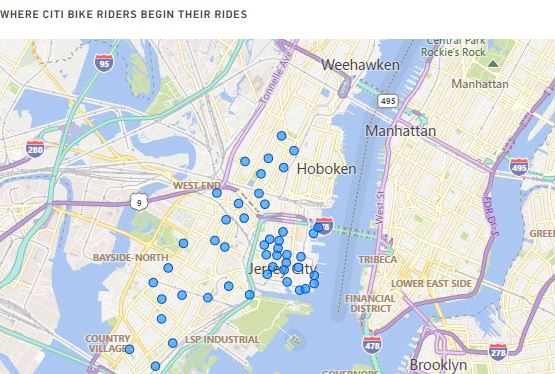

In [18]:
from IPython.display import Image
Image(filename='Start.jpg', width=400, height=100)

Below we can see where Citi Bike riders are end their journey. They're still largely in New Jersey, with some heading out to NYC.

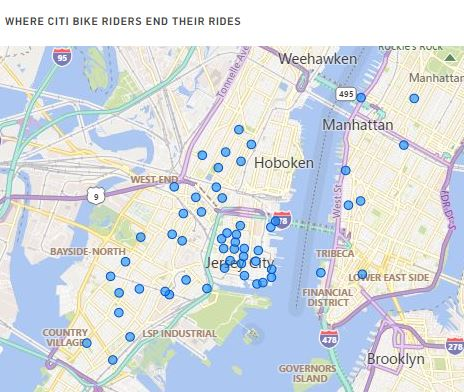

In [19]:
from IPython.display import Image
Image(filename='End.jpg', width=400, height=100)

Below we can see where Citi Bike riders are starting their journey. They all come from New Jersey, particulary in Jersey City. With some close to Hoboken.

##### How far do they go? 

- On average, riders travel around 13.25 mins.

In [56]:
df['Trip_Duration_in_Minutes'].mean()

13.256362516497985

##### Which bike stations are most popular? 

- Grove St Path and Exchange Place are the most popular stations.

In [22]:
# Exporting the data to excel so we can visualize it using excel.
df.to_csv('stations.csv', index = False)

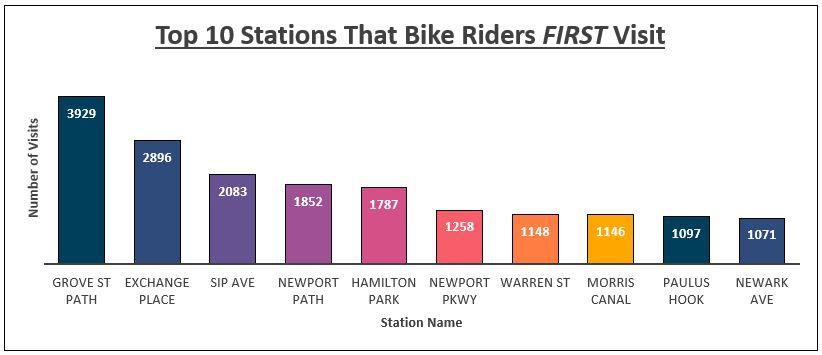

In [23]:
# Below we can see that Grove St Path and Exchange Place are the most popular stations that riders first visit.

from IPython.display import Image
Image(filename='Top_10_Stations.jpg', width=700, height=400)

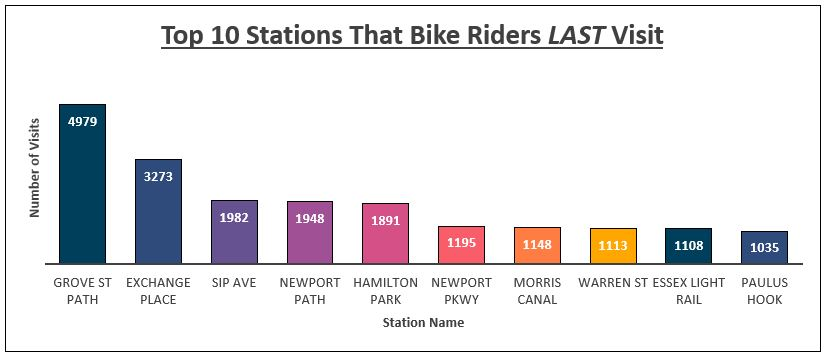

In [24]:
# Below we can see that Grove St Path and Exchange Place are also the stations that riders last visit.

from IPython.display import Image
Image(filename='Top_10.jpg', width=700, height=400)

##### What days of the week are most rides taken on?

- Monday, Tuesday and Wednesday

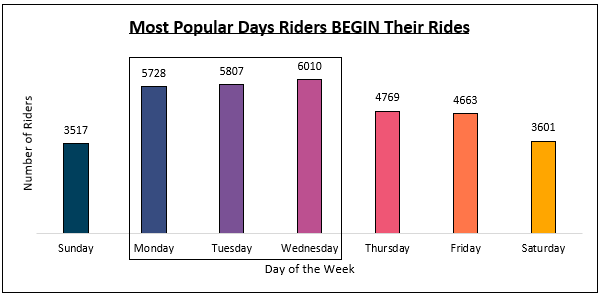

In [48]:
# Below we can see that Monday, Tuesday and Wednesday are the most popular day that riders begin their rides.

from IPython.display import Image
Image(filename='begin.png', width=700, height=400)

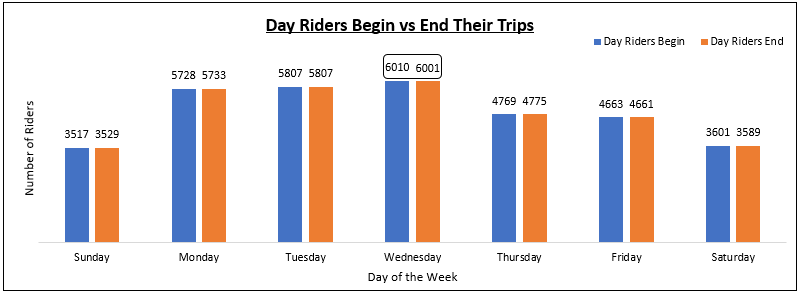

In [50]:
# The day riders begin their trips isn't necessarily the day they end their trip.
# Some appear to start their trips on one day but then end their trips on another day.

from IPython.display import Image
Image(filename='differences.png', width=700, height=400)

##### What time of the day do they ride? 

- 5PM - 7PM are when the largest number of riders start their rides.
- 12AM - 7AM are when the least number of riders start their rides.

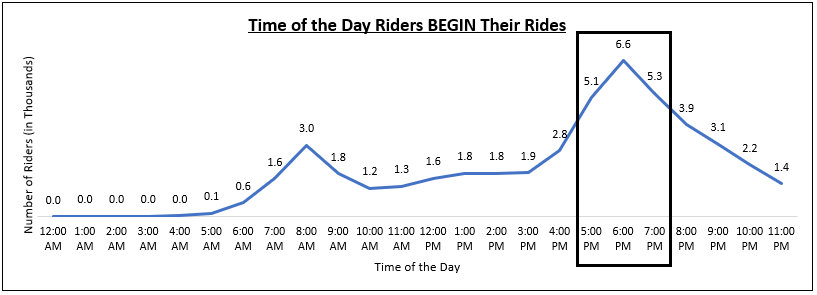

In [55]:
from IPython.display import Image
Image(filename='time_of_day.png', width=700, height=400)

##### What gender is the average bike rider?
- Male

In [25]:
# Duplicating the Gender field 
df['Gender_with_Values'] = df['Gender']

In [26]:
# Changing the values in the Gender_with_Values field from: 
# Zero to Unknown
# 1 to Male
# 2 to Female

df.replace(to_replace={'Gender_with_Values': {0: 'Unknown', 
                                                   1: 'Male', 
                                                   2: 'Female'}}
            ,inplace=True)

Text(0.5, 1.02, 'Count of Gender')

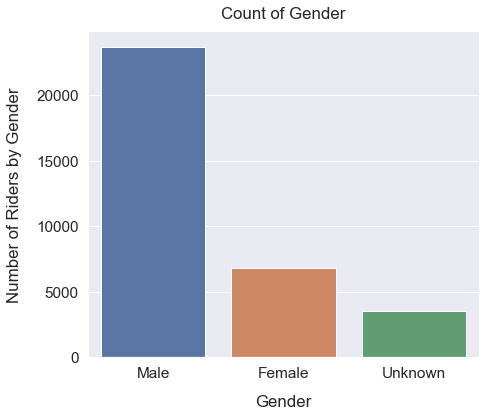

In [27]:
sns.set(font_scale=1.4)
plt.figure(figsize = (7, 6))
sns.countplot(x = df['Gender_with_Values'],
              data = df,
              order = df['Gender_with_Values'].value_counts(normalize=True).index)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Number of Riders by Gender", labelpad=14)
plt.title("Count of Gender", y=1.02)

##### What is the age of the average bike rider?
- 42

In [28]:
2022 - df['BirthYear'].mean() 

42.428990955550034

##### What type of pass do bike rider use?
- Majority of riders are annual members.

Text(0.5, 1.02, 'Count of UserType')

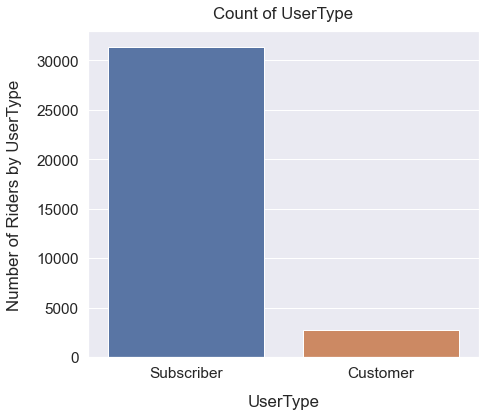

In [29]:
# Note that for the UserType field:
# Customer = 24-hour pass or 3-day pass user
# Subscriber = Annual Member

sns.set(font_scale=1.4)
plt.figure(figsize = (7, 6))
sns.countplot(x = df['UserType'],
              data = df,
              order = df['UserType'].value_counts(normalize=True).index)
plt.xlabel("UserType", labelpad=14)
plt.ylabel("Number of Riders by UserType", labelpad=14)
plt.title("Count of UserType", y=1.02)

##### How much revenue did Citibike generate in 2016?
- Revenue in 2016 ranged from 4.89 million USD to 4.96 million USD.

In [30]:
# In 2016, a Citibike annual membership was $155 and a one day pass was $12/day.
df['UserType'].value_counts()

Subscriber    31386
Customer       2709
Name: UserType, dtype: int64

In [31]:
# Revenue from subscribers was $4.86 million.
(31386 * 155)

4864830

In [32]:
# Revenue from customers assuming they all took one day passes was $32,508.
(2709 * 12)

32508

In [33]:
# Revenue from customers assuming they all took three day passes was $97,524.
(2709 * (12*3))

97524

In [34]:
4864830 + 32508

4897338

In [35]:
4864830 + 97524

4962354

In [36]:
4897338 / 1000000

4.897338